# Laboratorio 11: 
**Facultad de ingeniería, departamento de Ingeniería Biomédica, Universidad de los Andes**\
**IBIO-2440 Programación científica**

**Nombres de los integrantes**


1.   David Tobón Molina
2.   David Santiago Rodríguez Quiroga

**Número del grupo**

Grupo 2

En las últimas clases hemos visto las aplicaciones de la regresión en el modelamiento y filtrado de datos. Para obtener los coeficientes de la regresión partimos de un problema de optimización de mínimos cuadrados con la siguiente forma:

\begin{align*}
  \min_\beta ||y-H\beta||_2^2
\end{align*}

Al ser resuelto analíticamente obtenemos los los valores de $\beta$ que minimizan el problema a través de la fórmula:
\begin{align*}
  \beta^* =  (H^TH)^{-1}H^Ty
\end{align*}

Existen algunos escenarios en los que utilizar la norma L2 al cuadrado para definir el problema inicial de optimización no es ventajoso. En el presente laboratorio vamos a explorar dichos escenarios. Una forma distinta de plantear el problema inicial es utilizar la norma L1 del error. Consideremos siguiente problema:

\begin{align*}
  \min_\beta ||y-H\beta||_1
 \end{align*}

Este problema también buscar reducir el error entre $y$ y $H\beta$. Sin embargo, a diferencia de la optimización basada en mínimos cuadrados, este último método no puede ser resuelto de manera analítica, por lo que debemos utilizar las librerías de optimización de Python. 



1. Importe los datos del archivo *reg_1.xlsx*, la primera columna corresponde al eje x y la segunda al eje y.

In [22]:
from scipy.io import loadmat
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

global y
global H

mat_data = loadmat('Reg1.mat')
data_reg1_x = np.array(mat_data['x'][0])
data_reg1_y = np.array(mat_data['y'][0])
y = data_reg1_y
print(len(data_reg1_x))
print(len(data_reg1_y))

100
100


2. Obtenga los coeficientes de la regresión lineal utilizando el algoritmo de mínimos cuadrados, utilice un polinomio de orden 3.

In [23]:
def build_H(data, n):
    H = np.zeros((len(data), n+1))
    
    for i in range(len(H)):
        for j in range(len(H[0])):
            H[i][j] = data[i]**j
    return H


def get_betas(H, y):
    Ht = H.transpose()
    HtH = Ht.dot(H)
    Hty = Ht.dot(y)
    inv_HtH = np.linalg.inv(HtH)
    return inv_HtH.dot(Hty)


def calculate_regresion(H, betas):
    regresion = np.dot(H, betas)
    return regresion

In [24]:
H = build_H(data_reg1_x, 3)
betas_L2 = get_betas(H, y)
reg1_L2 = calculate_regresion(H, betas_L2)
print(betas_L2)

[-3.32473839  9.43353405 -4.83521534  0.83255594]


3. Ahora utilice la norma L1 para encontrar los coeficientes de la regresión. Utilice la función *minimize* de la librería *scipy.optimize*



In [25]:
def func_with_L1_norm(betas):
    return np.linalg.norm(y - np.dot(H, betas), ord=1)


def func_with_L2_norm(betas):
    return np.linalg.norm(y - np.dot(H, betas), ord=2)

In [26]:
initial_guess = np.zeros(len(H[0]))

min_betas_L1 = minimize(func_with_L1_norm, initial_guess)
betas_L1 = min_betas_L1.x
print("Betas usando norma L1:", betas_L1)

# min_betas_L2 = minimize(func_with_L2_norm, initial_guess)
# betas_L2 = min_betas_L2.x
print("Betas usando norma L2:", betas_L2)

reg1_L1 = calculate_regresion(H, betas_L1)
reg1_L2 = calculate_regresion(H, betas_L2)

Betas usando norma L1: [-3.39337284 10.06299029 -5.30917591  0.91869629]
Betas usando norma L2: [-3.32473839  9.43353405 -4.83521534  0.83255594]


4. Grafique la regresión obtenida junto con los datos. 

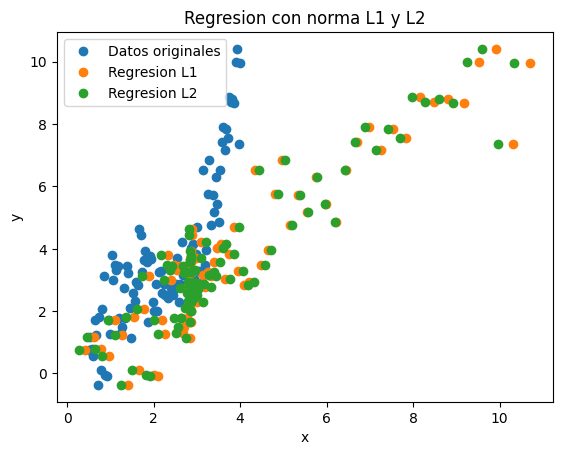

In [27]:
plt.figure()
plt.plot(data_reg1_x, y, 'o', label='Datos originales')
plt.plot(reg1_L1, y, 'o', label='Regresion L1')
plt.plot(reg1_L2, y, 'o', label='Regresion L2')
plt.title("Regresion con norma L1 y L2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

5. Realice el mismo procedimiento de los puntos 1-4 con los datos del archivo _reg_2.xlsx_.

[-4.82897628  9.53734182 -3.25087435  0.42829225]
Betas usando norma L1: [-5.35943099 12.73199075 -6.21651079  1.00930638]
Betas usando norma L2: [-4.8289538   9.53729979 -3.2508527   0.42828899]


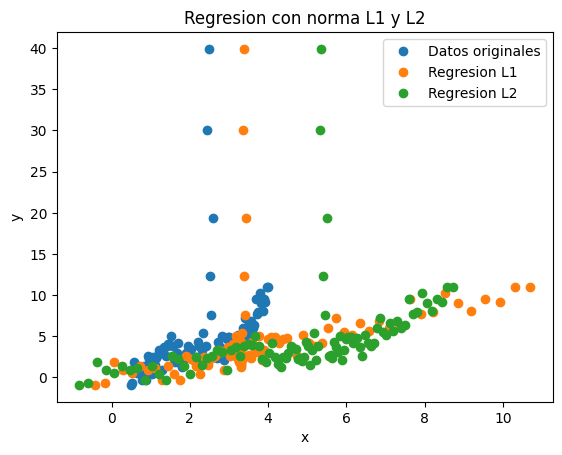

In [28]:
mat_data = loadmat('Reg2.mat')
data_reg2_x = np.array(mat_data['x'][0])
data_reg2_y = np.array(mat_data['y'][0])
y = data_reg2_y

H = build_H(data_reg2_x, 3)
betas_L2 = get_betas(H, y)
regresion2 = calculate_regresion(H, betas_L2)
print(betas_L2)

initial_guess = np.zeros(len(H[0]))

min_betas_L1 = minimize(func_with_L1_norm, initial_guess)
betas_L1 = min_betas_L1.x
print("Betas usando norma L1:", betas_L1)

min_betas_L2 = minimize(func_with_L2_norm, initial_guess)
betas_L2 = min_betas_L2.x
print("Betas usando norma L2:", betas_L2)

reg2_L1 = calculate_regresion(H, betas_L1)
reg2_L2 = calculate_regresion(H, betas_L2)

plt.figure()
plt.plot(data_reg2_x, y, 'o', label='Datos originales')
plt.plot(reg2_L1, y, 'o', label='Regresion L1')
plt.plot(reg2_L2, y, 'o', label='Regresion L2')
plt.title("Regresion con norma L1 y L2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

6. Compare el método basado en la norma L1 vs. la norma L2. ¿Qué ocurre con las regresiones cuando hay *outliers*$^1$ o anomalías? Refiérase al efecto de penalización que ocurre en cada caso. 

 > 1. *En términos simples, un outlier es una medición extremadamente alta o baja en relación con el conjunto de datos con los que se está trabajando.*